In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("train.csv")   # use your file name
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
df['Date'] = pd.to_datetime(df['Date'])


In [4]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
weekly_sales.set_index('Date', inplace=True)

weekly_sales.head()


,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30


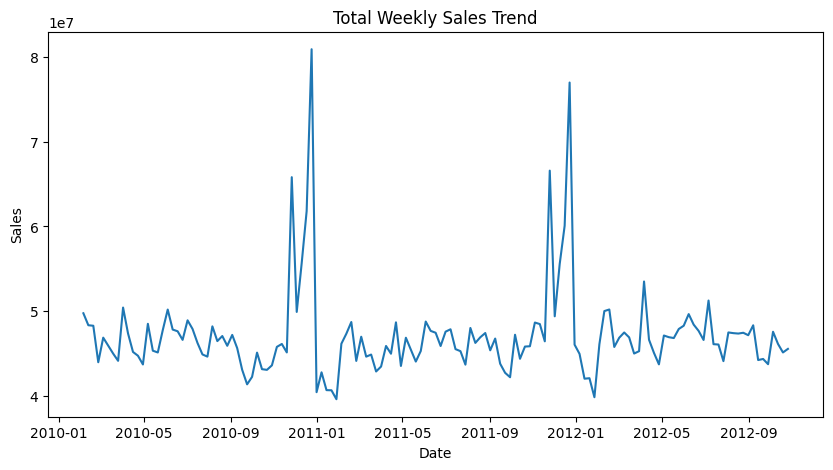

In [5]:
plt.figure(figsize=(10,5))
plt.plot(weekly_sales['Weekly_Sales'])
plt.title("Total Weekly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [6]:
train = weekly_sales[:-12]
test = weekly_sales[-12:]


In [7]:
model = ExponentialSmoothing(
    train['Weekly_Sales'],
    trend='add',
    seasonal=None
).fit()

forecast = model.forecast(12)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


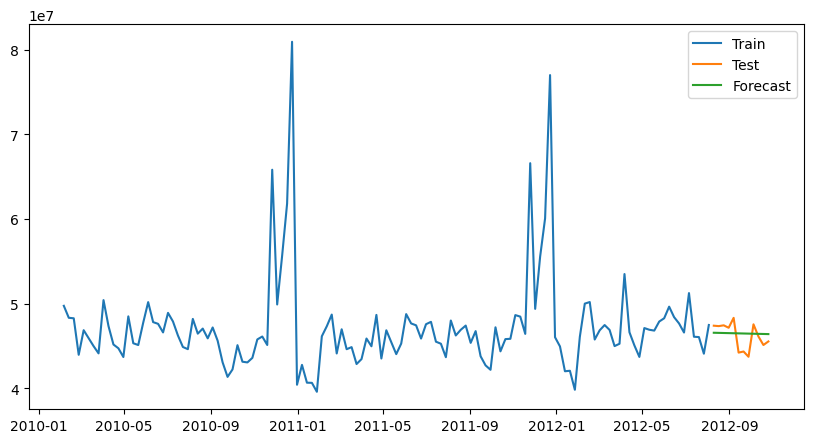

In [8]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train['Weekly_Sales'], label='Train')
plt.plot(test.index, test['Weekly_Sales'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.show()


In [9]:
mae = mean_absolute_error(test['Weekly_Sales'], forecast)
mape = np.mean(np.abs((test['Weekly_Sales'] - forecast) / test['Weekly_Sales'])) * 100

print("MAE:", mae)
print("MAPE:", mape)


MAE: 1310005.5872223594
MAPE: 2.8713452452999815


In [10]:
forecast_df = pd.DataFrame({
    'Actual': test['Weekly_Sales'],
    'Forecast': forecast
})

forecast_df.to_csv("forecast_output.csv")


In [11]:
from google.colab import files
files.download("forecast_output.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>